# Stats Stats Go Away ☔️, Come Back Another Day☔️☔️☔️
## How ‘bout in 5 days, fam? 👌🏻👌🏻👌🏻


Entire data set
Descriptives: transactions

The number of transactions per day significantly increases over time, p < .001 (regression not pictured). The average number of transactions per day was M =, SD = .
Fig 1. No. of ETH transactions per day

 
 

Descriptives: price
The average price of ETH at midnight UTC significantly increased over time, p < .001 (regression not pictured). The average price of ETH was M = , SD = .
Fig 2. ETH closing price per day (at midnight)

 

Regression. 
Using single regression, we entered number of transactions as the predicting factor for the daily price of ETH. For every one change in the number of  transactions, there is a $0.0008933 change in the value of ETH in USD. This is significant (t = 59.85), p < .001.
 
Variables in the data:
response variables = ETH price
predictor = TxDay
Fig 3. Transactions vs. Ether price regression.

 
Discussion
Although it may seem obvious that time relates to both the number of transactions and the price of ether, it is not a given that ether’s price and the number of transaction themselves would have their own significant relationship. 

Although the effects were significant, one could argue that they are not meaningful in the real world because of the magnitude of the numbers. However, let’s consider that the regression showed that increasing one transaction per day changes the value of ETH by 8.9 ten-thousandths of a dollar. Since the average number of transactions per day is ~242,023 (SD = ?), we can convert these values into a more economically more meaningful scale. So, if we consider the scale in the tens of thousands, for every 10,000 transactions, the price of ether increases  by $8.933.

For every one change in the number of  transactions, there is  $0.0008933 change in the value of ETH in USD.
 
Exploratory: 2 volatile years (graphs missing)
[incomplete, graphs missing. We’ve computed them but didn’t save them]
One thing we were wondering is whether the significant relationship between number of transactions and ether is being influenced by the outliers and atypical days after the launch of the ethereum network and while the network was being adopted and troubleshooted. Because of the significant kurtosis (reference), it is reasonable to exclude the volatile time period from the beginning, especially considering the change in range for the first year (value) to the second (values) and the third. 

Since this model is post hoc and exploratory, we took a convenience sample of 200 days to determine whether this relationship only occurs after a giant explosion in value or whether it could be a fundamental nature of how these two variables interact [blah].

For every one change in transactions after 720 days, there is a 0.0009151 change ETH in USD. This is significant (t = 33), p < .001.
641,738 T x * 0.0008933 USD = 573.2645554 USD
Average change per 1 transactions: 0.0008933
Average change per 10 transactions: 0.008933
Average change per 1,000 transactions: 0.8933 USD
m(ETH) = 550.803805 USD
 
 
 
 
 
Craaaaaaaazy weird: Highest number of transactions: January 4, 2018
We noticed a trend that warrants more investigation. It’s possible that a significant part of the variance in the relationship between daily transactions and ether price is being subsumed by a time lag variable, which has not been discussed in the literature.
 
Prediction: 1349890 * 0.0008933 = 1,205.856737
Actual: ~944.83 USD
5 days later: ~1,289.24 USD


Final discussion yo
Hey fam, you should realize that right now the number of transactions is based on an immature network. To date, no published results have analyzed what percentage of the transactions on the ethereum network are simple trades (wallet transferring) or computations as part of smart contracts. Additionally, the creation of new contracts is also counted by the network as a transaction, as well. Future work could explore whether this relationship is due to an underlying covariant characteristic of the transactions themselves. For instance, it is possible that the number of transactions does not increase the price of ETH once we eliminate the significant number of speculative trading via open exchanges (coinbase, etc.). In contrast, it is also possible that the number of computational/non-speculative transactions themselves is related to an increase in speculative transactions, which then influences the price of Ether. This could explain the potential lag variable we are exploring, blah. 

Also, what about seasons yo?


### Install Packages

In [4]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

%matplotlib inline


    100% |████████████████████████████████| 16.7MB 567kB/s ta 0:00:011   40% |█████████████▏                  | 6.8MB 3.3MB/s eta 0:00:03


In [19]:
#regression.py
#Python V3.6.5

#This file is for displaying the neccessary graphs in a neat format to display for regression
#Should also output the needed values, already known that p < 1E-16

#Display Graph of Tx over Time, Prices over Time, Tx vs Prices scatter + Regression


# --------------AGENDA--------------
# 1 - Give Overview of why/Introduction to problem statement
# 2 - Review the data sources
# 3 - Show raw data CSV and explain variable names
# 4 - Review Section 1: Data Wrangling
# 5 - Review Section 2: Statistics
# 6 - Review Section 3: Plot Data
# 7 - Explore interpretations and hypotheses

In [6]:
#Imports needed to make things run
import math, scipy, csv
from scipy import stats #The primary regression model library
import pandas as pd #Used for advanced dataframes
from sklearn import linear_model
import matplotlib.pyplot as plt #Used for visual plots
from sklearn.linear_model import LinearRegression #Library used for regression to output T-Value and P-Value where scipy does not
import numpy as np #For more consistent math


In [7]:
#Stolen class from GitHub to expand SKLearn's Usability
class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self


In [8]:
#--------------------------------------------
#Section 1: Data Wrangling
#Grabbing raw data from .CSV files
#Source: etherscan.io
#
#all_charts_url	 = https://etherscan.io/charts 				# all/other sources of data
#number_tx_url	 = https://etherscan.io/chart/tx 			# no. per day
#ETH_price_url	 = https://etherscan.io/chart/etherprice 	# USD
#Parsing data into usuable list formats
#Computing new data sets based on grabbed data
#
#Small function to grab and parse data from the csv files
def grabRow(filename,index):
	#Open specified file
	with open(filename, newline='') as csvfile:
		#Open the csv reader
		file = csv.reader(csvfile, delimiter=' ', quotechar='|')
		#Parse the data and grab only the column we want
		column = [row[0].split(',')[index] for row in file]
		column = [float(entry.replace("\"","")) for entry in column[1:]]
	return column

#Grab ethPrice and txCount from the .csv files
ethPrice = grabRow('eth_data/original_data/export-EtherPrice.csv', 2)

txCount =grabRow('eth_data/original_data/export-TxGrowth.csv', 2)


#Setup days for each entry
timeDays = [i for i in range(len(txCount))]


#Create cumulative transactions instead of transaction growth
cumTx = []
i = 0
for tx in txCount:
	if i == (0):
		cumTx.append(tx)
		i += 1
		continue
	cumTx.append(tx + cumTx[i-1])


#Setup data to be compatible with SKLearn's Regression object
#Set Dictionary headers to be used for dataframe
data = {'Price': ethPrice, 'Transactions': txCount}
#Create Dataframe from dictionary
df = pd.DataFrame(data)

#Assign Variables to the dataframe sections
X = df.drop('Price', axis = 1)
Y = df.drop('Transactions', axis = 1)

#--------------------------------------------

In [9]:
#Section 2:
#Run Regression, form regression line, and grab relevant data
#Use Scipy's Regression model so we can grab slop, intercept and R value.
#Unused:
#	r: R Value
#	p: P Value
#	err: Error
m,b,r,p,err = scipy.stats.linregress(txCount, ethPrice)

regressionLine = [(m * point) + b for point in txCount]

#Use SKLearn's Regression model to grab T-Value and P-Value
lm = LinearRegression()
#Fit the model using the data grabbed from the dataframe established above
lm.fit(X, Y)
#Grab data from regression model
t_value = lm.t[0][0]
p_value = lm.p[0][0]

#Get the average of the transactions and price.
mean_tx = sum(txCount) / len(txCount)

mean_price = sum(ethPrice) / len(ethPrice)


#--------------------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


P-Value: 0.0
T-Value: 142.5675875887892
Mean Price: 199.00074598677998
Mean Tx: 242023.01322001888
Slope: 0.0008933281826910828
Intercept: -17.205232582479397


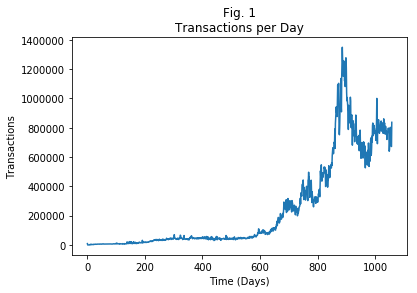

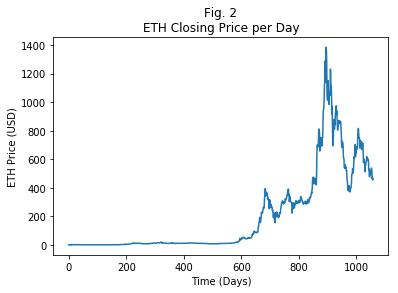

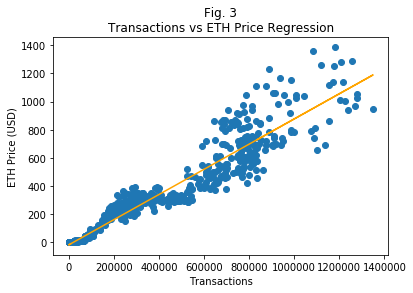

In [10]:
#Section 3:
#Plot Data and Output Data


#Outputting Raw Values
print("P-Value: " + str(p_value))
print("T-Value: " + str(t_value))
print("Mean Price: " + str(mean_price))
print("Mean Tx: " + str(mean_tx))
print("Slope: " + str(m))
print("Intercept: " + str(b))


#Plotting Data
#Figure 1: Transaction per Day
plt.title("Fig. 1\nTransactions per Day")
plt.xlabel("Time (Days)")
plt.ylabel("Transactions")
plt.plot(timeDays, txCount)
plt.show()

#Figure 2: ETH Closing Price per Day
plt.title("Fig. 2\nETH Closing Price per Day")
plt.xlabel("Time (Days)")
plt.ylabel("ETH Price (USD)")
plt.plot(timeDays, ethPrice)
plt.show()


#Figure 3: Transactions vs ETH Price Regression
plt.title("Fig. 3\nTransactions vs ETH Price Regression")
plt.xlabel("Transactions")
plt.ylabel("ETH Price (USD)")
plt.scatter(txCount, ethPrice)
plt.plot(txCount, regressionLine, color="orange")
plt.show()
